In [1]:
import os, pandas as pd, numpy as np

In [17]:
os.chdir("/Users/preethireddy/Downloads/stats")

In [22]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [23]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [24]:
KA = df[df['state_1']=="KA"]

In [25]:
KA.isnull().sum().sort_values(ascending = False)

soyabean_q             4094
soyabean_v             4094
Meals_School           4057
Meals_Employer         3979
Otherwise_possessed    3950
                       ... 
brinjal_q                 0
tamato_q                  0
onion_q                   0
potato_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [26]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [27]:
KA_new = KA[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [28]:
KA_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       59
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [29]:
KA_clean = KA_new.copy()

In [30]:
KA_clean.loc[:, 'Meals_At_Home'] = KA_clean['Meals_At_Home'].fillna(KA_new['Meals_At_Home'].mean())

In [31]:
KA_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [32]:
# Outlier Checking

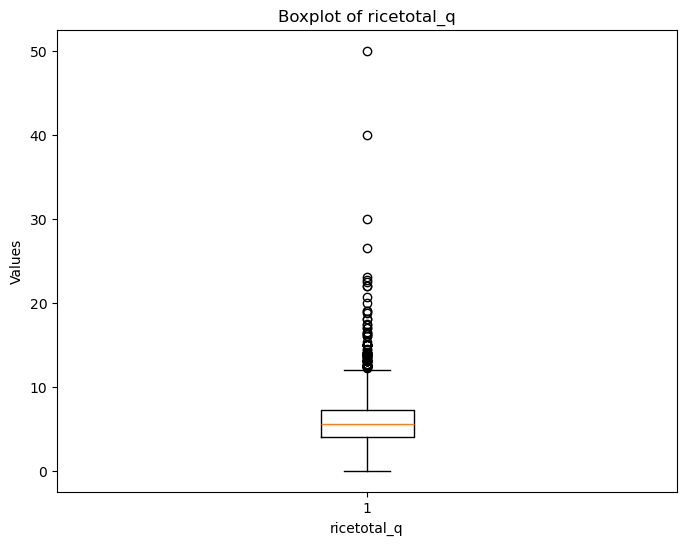

In [33]:
import matplotlib.pyplot as plt
# Assuming KA_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(KA_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [34]:
rice1 = KA_clean['ricetotal_q'].quantile(0.25)
rice2 = KA_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [35]:
KA_clean=KA_new[(KA_new['ricetotal_q']<=up_limit)&(KA_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1234f0a10>,
 'caps': [<matplotlib.lines.Line2D at 0x1234f2350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1234e7f50>],
 'medians': [<matplotlib.lines.Line2D at 0x1234f3a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1234f8590>],
 'means': []}

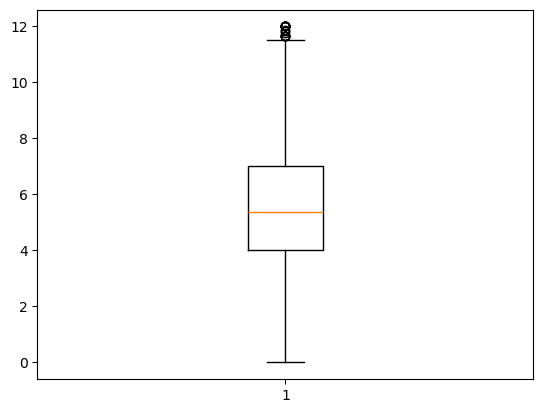

In [36]:
plt.boxplot(KA_clean['ricetotal_q'])

In [37]:
KA_clean['District'].unique()

array([14, 13, 12, 11,  9, 10,  8,  7,  6,  5,  3,  4,  2,  1, 20, 29, 28,
       27, 26, 19, 18, 17, 16, 15, 24, 25, 23, 21, 22])

In [38]:
# Replace values in the 'Sector' column
KA_clean.loc[:,'Sector'] = KA_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [39]:
#total consumption

In [42]:
KA_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home',
       'total_consumption'],
      dtype='object')

In [43]:
KA_clean.loc[:, 'total_consumption'] = KA_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [44]:
KA_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
23109,KA,14,RURAL,4,294,6.285714,0.714286,0.142857,0,0.071429,0.071429,17.925351,17.860714,54.0,43.071779
23110,KA,14,RURAL,4,294,6.000000,1.666667,0.166667,0,0.000000,0.233333,25.517352,6.668333,30.0,40.252352
23111,KA,14,RURAL,4,294,5.600000,1.000000,0.100000,0,0.600000,0.000000,25.470640,7.000000,60.0,39.770640
23112,KA,14,RURAL,4,294,7.333333,1.666667,0.083333,0,0.000000,0.000000,29.984010,0.002000,60.0,39.069343
23113,KA,14,RURAL,4,294,4.400000,1.000000,0.100000,0,0.300000,0.050000,17.760602,11.604800,58.0,35.215402


In [45]:
KA_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              33.537589  56.562054  240.939890  0.0
2              18.661289  42.177319  169.276175  0.0
3              33.882470  48.992320  510.680200  0.0
4              17.629887  35.708196  294.392200  0.0

In [46]:
KA_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                18.460535  37.581180  210.525720   0.000000
2                18.975459  38.010955  131.700495   9.908449
3                14.198422  36.550866  114.850580   0.000000
4                13.038797  30.725391   87.778964   0.000000
5                14.761557  30.801951  130.986330  11.148364
6                12.753432  31.786290   91.130658   0.000000
7                11.794228  32.492318   76.739168   0.000000
8                22.011913  38.304735  139.825445  16.264100
9                19.399639  42.703786  108.450668   0.000000
10               21.595778  46.749832  145.200651   0.000000
11               19.249753  36.949687  153.957628   0.000000
12               24.464122  34.824291  294.392200   0.000000
13               16.074194  33.565538   98.610180   0.000000
14               13.732162  41.182425   91.138227  18.465225
15               12.310316  39.257490   80.351410   0.000000
16               27.534855  55.070694  145.000000  10.000000
17               14.746375  37.605361  105.900747  15.943876
18               24.934488  44.705044  174.321215   0.000000
19               40.511767  55.332137  375.200000   0.000000
20               47.082568  56.623548  510.680200   0.000000
21               26.967693  51.017065  151.143282   0.000000
22               14.555312  42.056816   92.752672   0.000000
23                9.651648  39.393864   73.625825  22.587637
24               41.719828  65.618742  240.939890   0.000000
25               33.243373  62.353279  169.276175  19.770280
26               18.589096  43.330388  154.172892   0.000000
27               21.704094  42.764036  160.000000   0.000000
28               22.628413  43.920693  148.331290   0.000000
29               14.119386  42.184079   92.971605   0.000000

In [48]:
total_consumption_by_districtcode=KA_clean.groupby('District')['total_consumption'].sum()

In [49]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
20    26896.185185
24     9777.192533
1      9508.038520
Name: total_consumption, dtype: float64

In [51]:
KA_clean.loc[:,"District"] = KA_clean.loc[:,"District"].replace({20: "Bangalore", 24: "Dakshina Kannada", 1: "Belgaum"})

In [52]:
total_consumption_by_districtname=KA_clean.groupby('District')['total_consumption'].sum()

In [53]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Bangalore           26896.185185
Dakshina Kannada     9777.192533
Belgaum              9508.038520
Name: total_consumption, dtype: float64

In [54]:
from statsmodels.stats import weightstats as stests

In [55]:
rural=KA_clean[KA_clean['Sector']=="RURAL"]
urban=KA_clean[KA_clean['Sector']=="URBAN"]

In [56]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
23109,KA,14,RURAL,4,294,6.285714,0.714286,0.142857,0,0.071429,0.071429,17.925351,17.860714,54.0,43.071779
23110,KA,14,RURAL,4,294,6.000000,1.666667,0.166667,0,0.000000,0.233333,25.517352,6.668333,30.0,40.252352
23111,KA,14,RURAL,4,294,5.600000,1.000000,0.100000,0,0.600000,0.000000,25.470640,7.000000,60.0,39.770640
23112,KA,14,RURAL,4,294,7.333333,1.666667,0.083333,0,0.000000,0.000000,29.984010,0.002000,60.0,39.069343
23113,KA,14,RURAL,4,294,4.400000,1.000000,0.100000,0,0.300000,0.050000,17.760602,11.604800,58.0,35.215402


In [57]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
60261,KA,26,URBAN,3,293,5.714286,0.571429,0.00,0,0.0,0.00,19.625834,12.000000,90.0,37.911548
60262,KA,26,URBAN,3,293,6.000000,0.800000,0.03,0,0.0,0.12,24.230239,11.000000,90.0,42.180239
60263,KA,26,URBAN,3,293,5.000000,0.600000,0.00,0,0.0,0.00,22.735184,8.001400,90.0,36.336584
60264,KA,26,URBAN,3,293,7.750000,0.750000,0.00,0,0.5,0.00,22.557810,10.000000,90.0,41.557810
60265,KA,26,URBAN,3,293,5.666667,1.000000,0.00,0,0.0,0.00,22.580288,8.333333,84.0,37.580288


In [58]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [59]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 8.599789717503517
P-Value: 7.986229206112306e-18
